# **Define Problem Statement and perform Exploratory Data Analysis**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('logistic_regression.csv')

In [3]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [4]:
print(f'Number of rows in data: {df.shape[0]}')
print(f'Number of columns in data: {df.shape[1]}')

Number of rows in data: 396030
Number of columns in data: 27


In [5]:
#statistical summary of data
df.describe(include='all')

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
count,396030.000000,396030,396030.000000,396030.000000,396030,396030,373103,377729,396030,3.960300e+05,...,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,396030,396030,358235.000000,395495.000000,396030
unique,NaN,2,NaN,NaN,7,35,173105,11,6,NaN,...,NaN,NaN,NaN,NaN,NaN,2,3,NaN,NaN,393700
top,NaN,36 months,NaN,NaN,B,B3,Teacher,10+ years,MORTGAGE,NaN,...,NaN,NaN,NaN,NaN,NaN,f,INDIVIDUAL,NaN,NaN,USCGC Smith\r\nFPO AE 70466
freq,NaN,302005,NaN,NaN,116018,26655,4389,126041,198348,NaN,...,NaN,NaN,NaN,NaN,NaN,238066,395319,NaN,NaN,8
mean,14113.888089,NaN,13.639400,431.849698,NaN,NaN,NaN,NaN,NaN,7.420318e+04,...,11.311153,0.178191,1.584454e+04,53.791749,25.414744,NaN,NaN,1.813991,0.121648,NaN
std,8357.441341,NaN,4.472157,250.727790,NaN,NaN,NaN,NaN,NaN,6.163762e+04,...,5.137649,0.530671,2.059184e+04,24.452193,11.886991,NaN,NaN,2.147930,0.356174,NaN
min,500.000000,NaN,5.320000,16.080000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,...,0.000000,0.000000,0.000000e+00,0.000000,2.000000,NaN,NaN,0.000000,0.000000,NaN
25%,8000.000000,NaN,10.490000,250.330000,NaN,NaN,NaN,NaN,NaN,4.500000e+04,...,8.000000,0.000000,6.025000e+03,35.800000,17.000000,NaN,NaN,0.000000,0.000000,NaN
50%,12000.000000,NaN,13.330000,375.430000,NaN,NaN,NaN,NaN,NaN,6.400000e+04,...,10.000000,0.000000,1.118100e+04,54.800000,24.000000,NaN,NaN,1.000000,0.000000,NaN
75%,20000.000000,NaN,16.490000,567.300000,NaN,NaN,NaN,NaN,NaN,9.000000e+04,...,14.000000,0.000000,1.962000e+04,72.900000,32.000000,NaN,NaN,3.000000,0.000000,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [7]:
#numerica v/s categorical
numerical_columns = df.select_dtypes(include = ['int64', 'float64']).columns.tolist()
categorical_columns = df.select_dtypes(include = ['object']).columns.tolist()

for col in categorical_columns:
  df[col] = df[col].astype('category')

print(df.dtypes)

loan_amnt                float64
term                    category
int_rate                 float64
installment              float64
grade                   category
sub_grade               category
emp_title               category
emp_length              category
home_ownership          category
annual_inc               float64
verification_status     category
issue_d                 category
loan_status             category
purpose                 category
title                   category
dti                      float64
earliest_cr_line        category
open_acc                 float64
pub_rec                  float64
revol_bal                float64
revol_util               float64
total_acc                float64
initial_list_status     category
application_type        category
mort_acc                 float64
pub_rec_bankruptcies     float64
address                 category
dtype: object


## **Univariate Analysis**

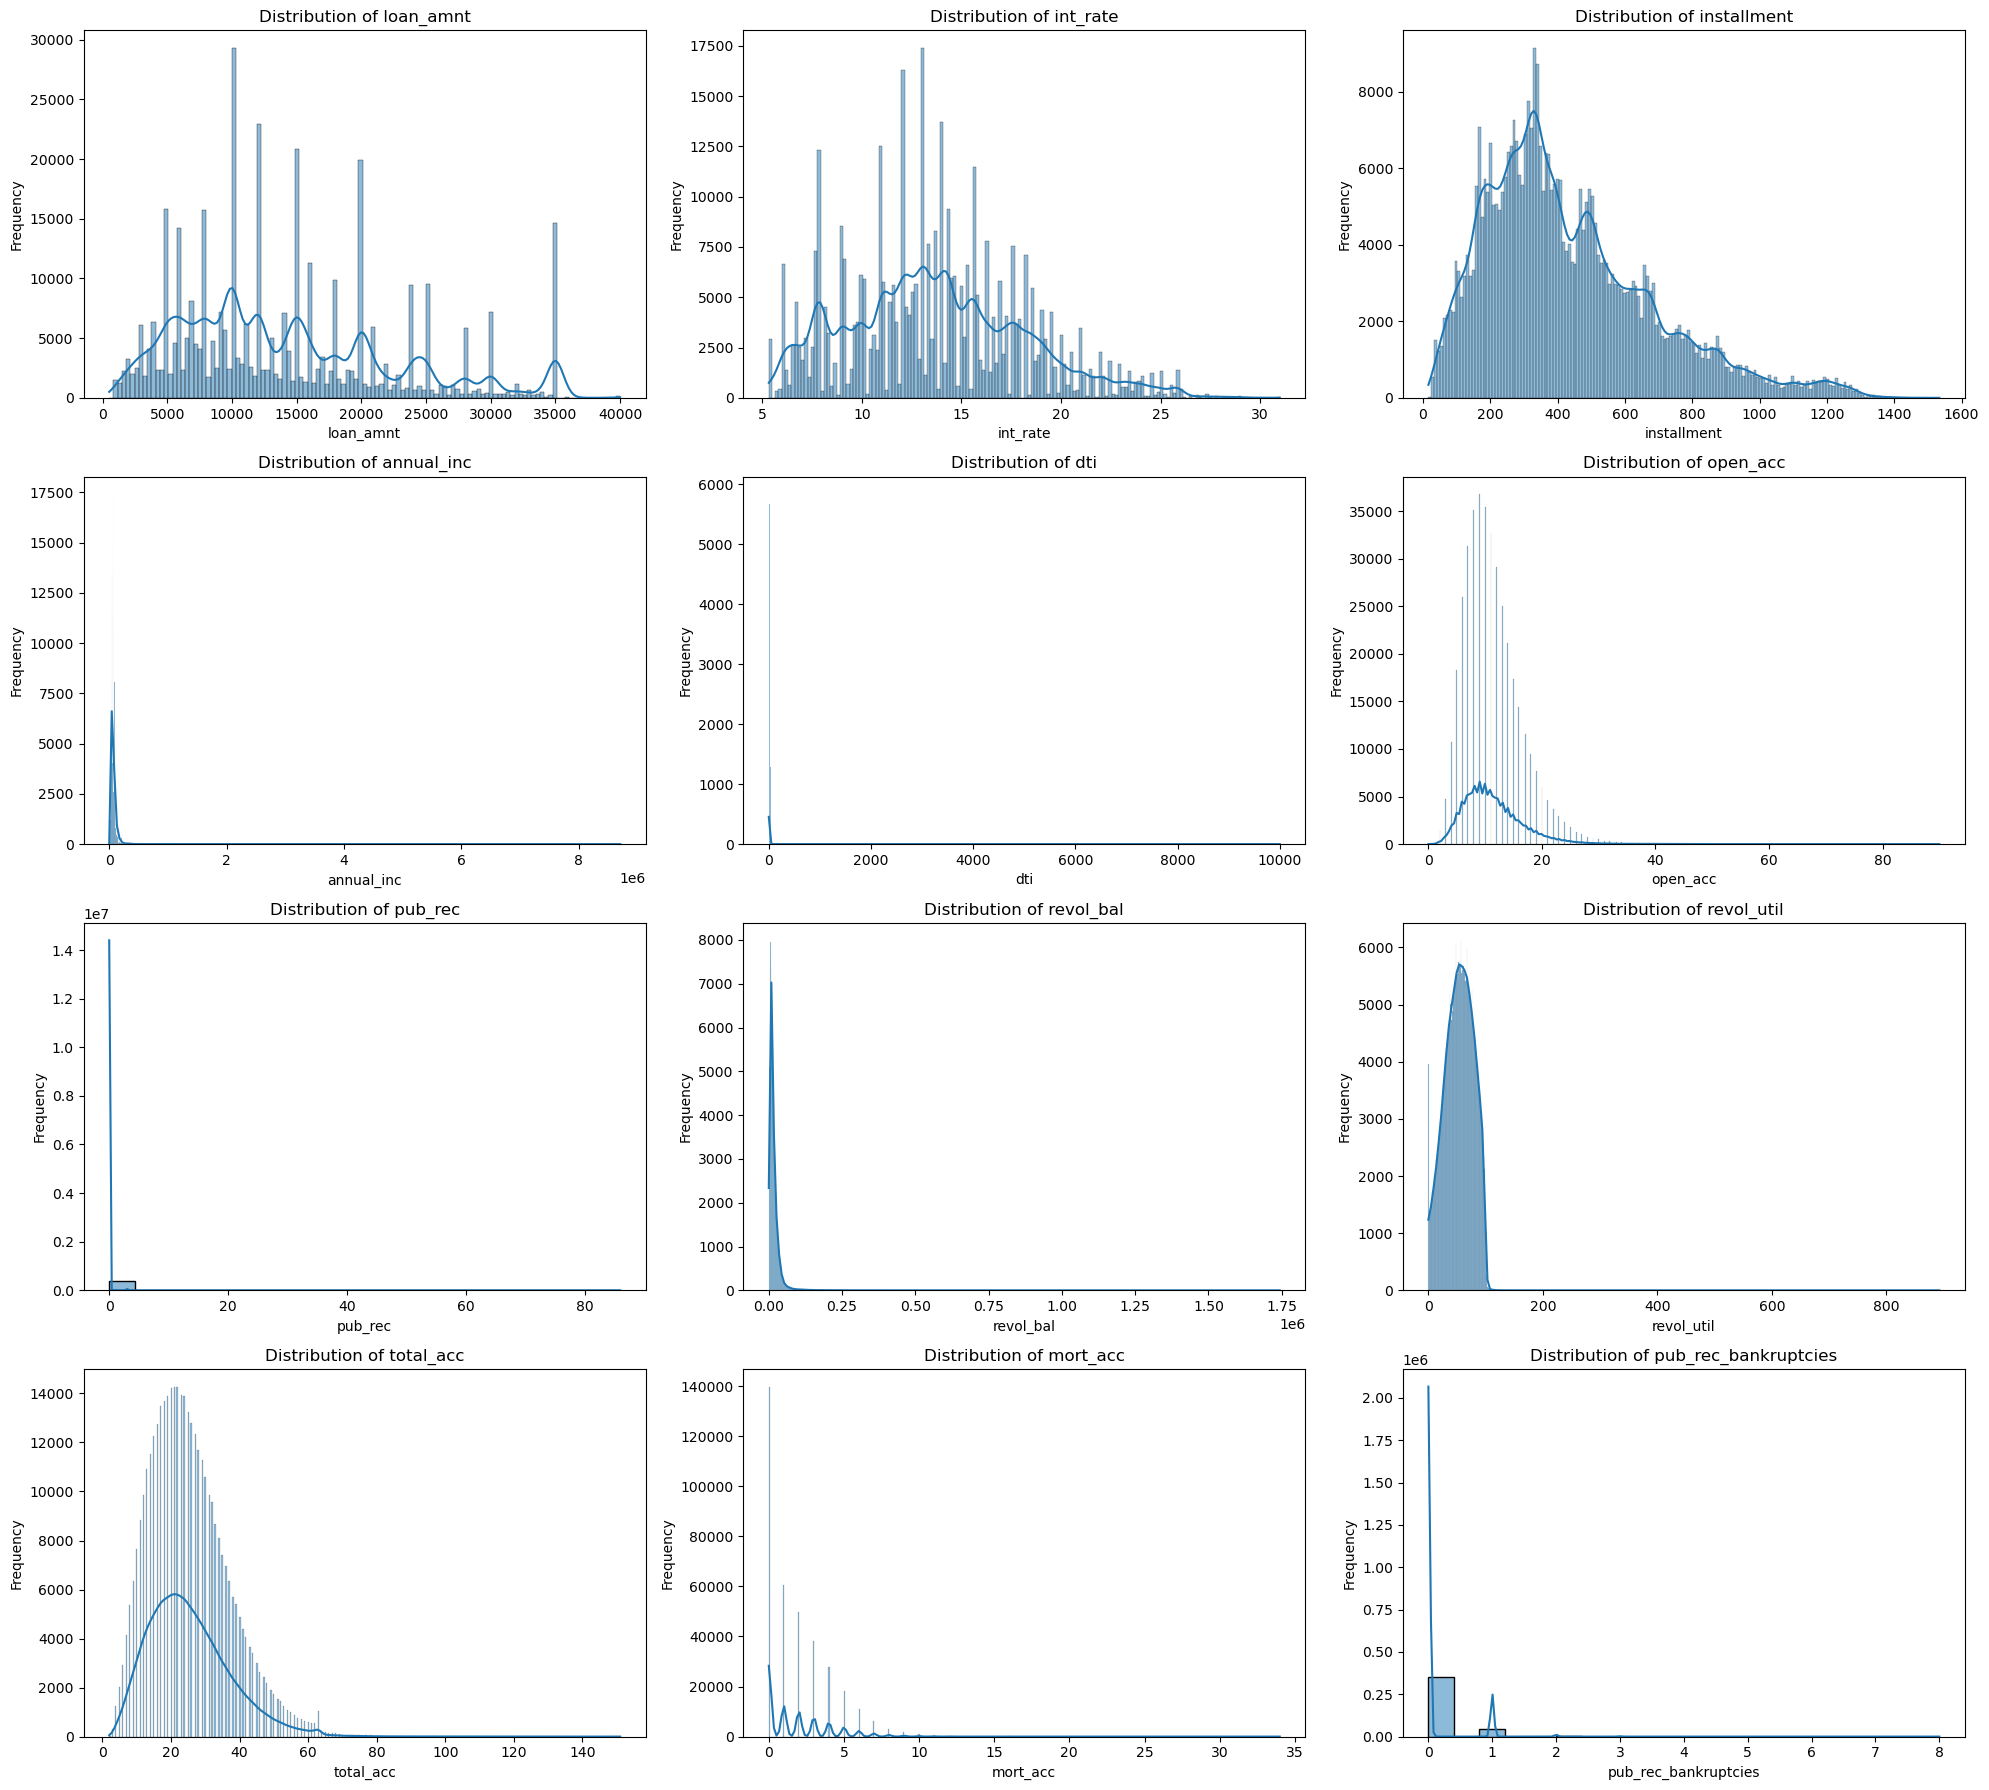

In [8]:
fig, axes = plt.subplots(nrows = 4, ncols = 3, figsize = (20,18))
axes = axes.flatten()
for ax, col in zip(axes, numerical_columns):
  sns.histplot(df[col], ax=ax, kde = True)
  ax.set_title(f'Distribution of {col}')
  ax.set_xlabel(col)
  ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [9]:
important_columns = [
    'loan_status',
    'purpose',
    'grade',
    'sub_grade',
    'emp_length',
    'home_ownership',
    'verification_status'
]


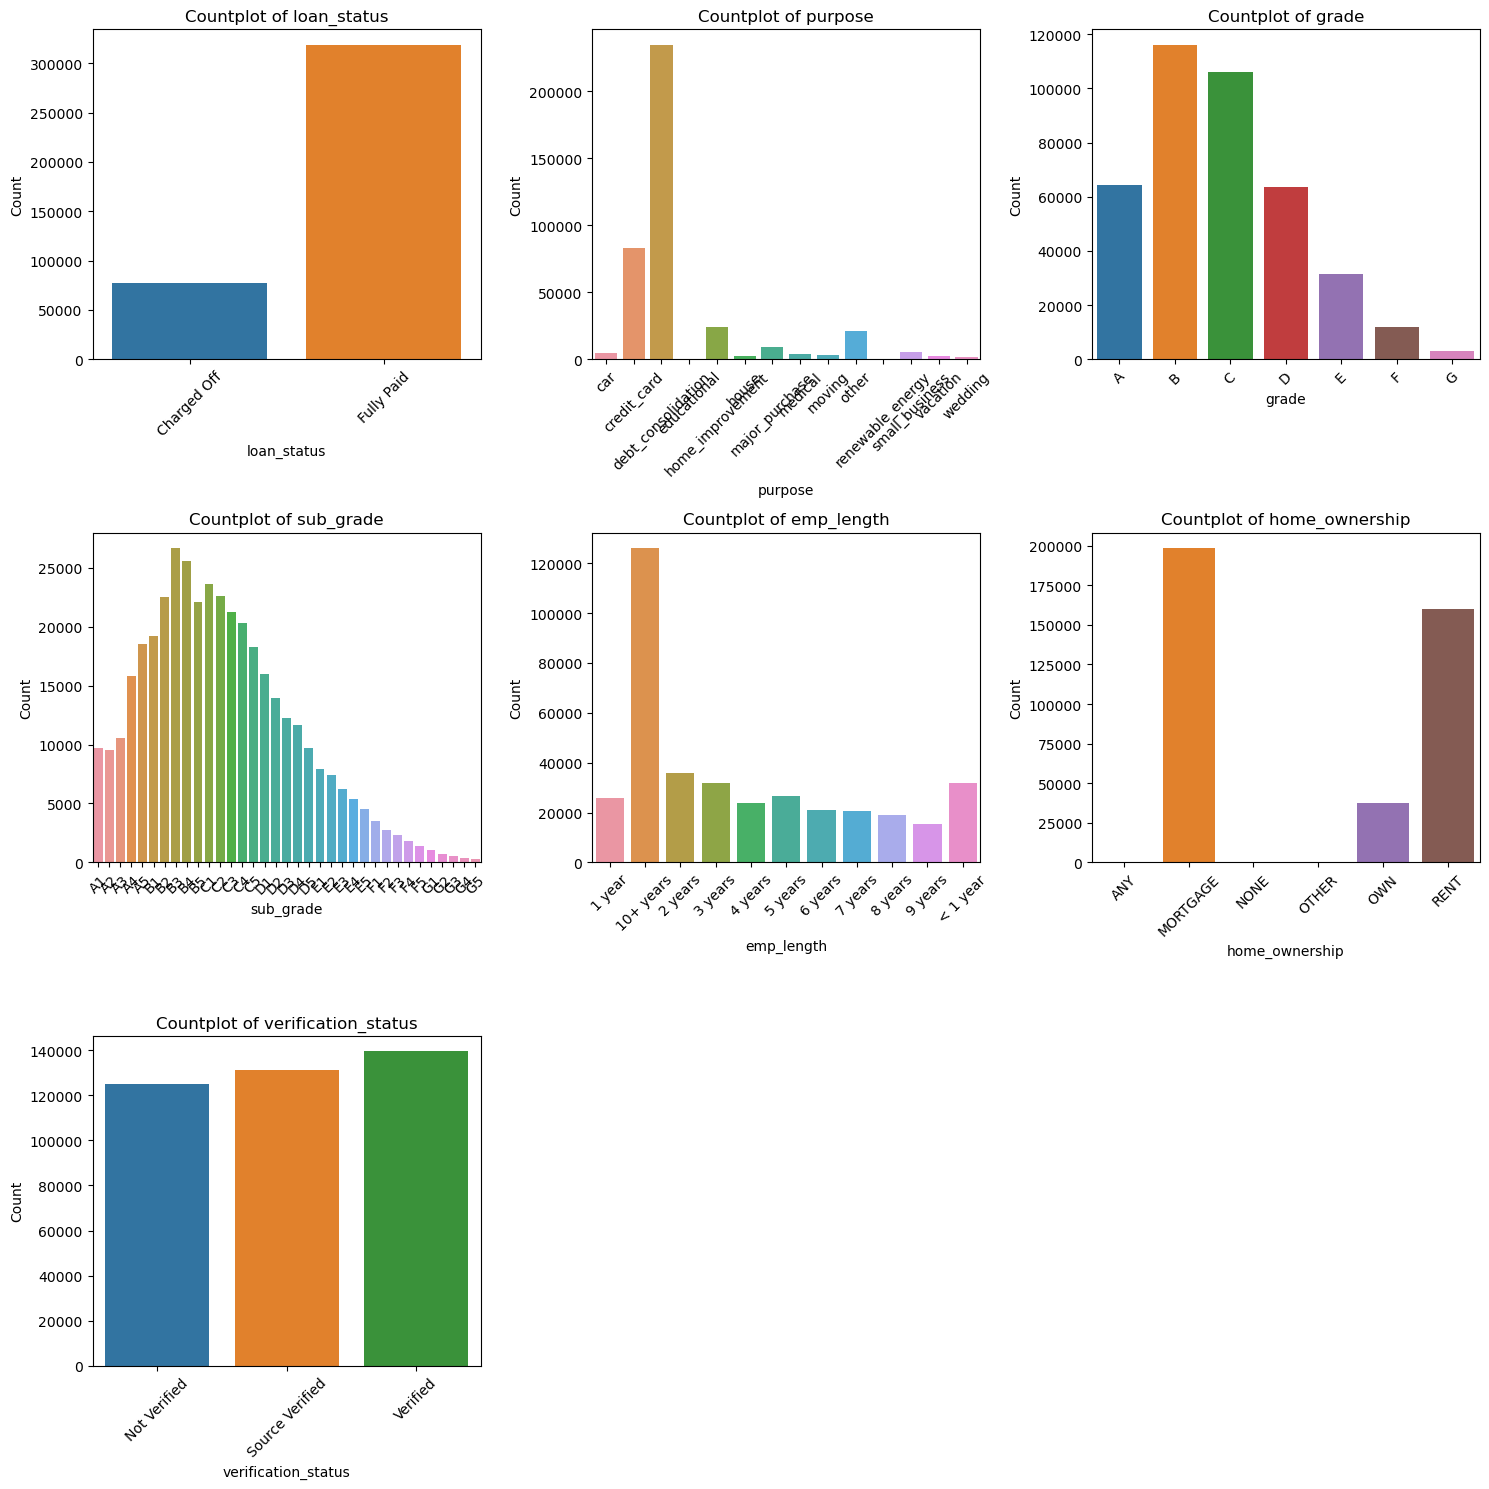

In [10]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
axes = axes.flatten()

for ax, col in zip(axes, important_columns):
    sns.countplot(x=col, data=df, ax=ax)
    ax.set_title(f'Countplot of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

for ax in axes[len(important_columns):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

## **Bivariate Analysis**

### Numerical - Numerical Analysis

[]

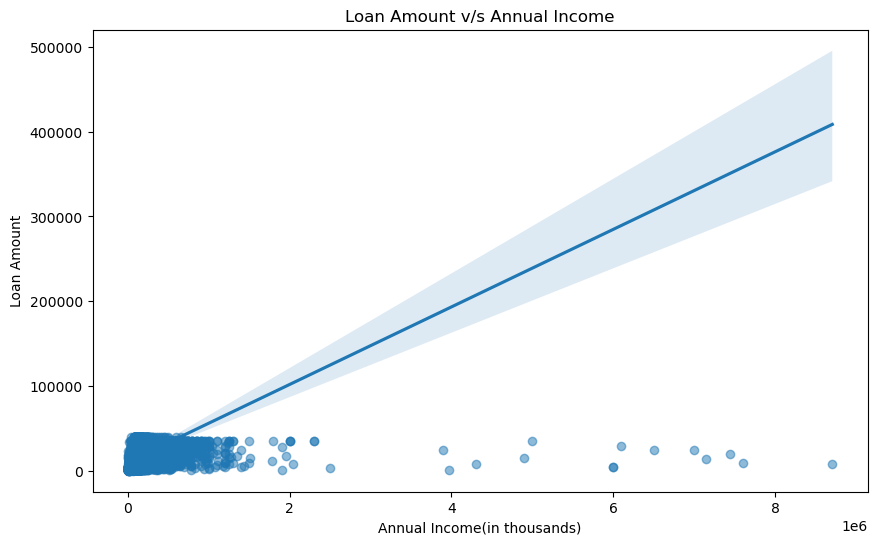

In [11]:
plt.figure(figsize=(10,6))
sns.regplot(x = 'annual_inc', y = 'loan_amnt', data = df, scatter_kws={'alpha': 0.5})
plt.xlabel('Annual Income(in thousands)')
plt.ylabel('Loan Amount')
plt.title('Loan Amount v/s Annual Income')
plt.plot()

[]

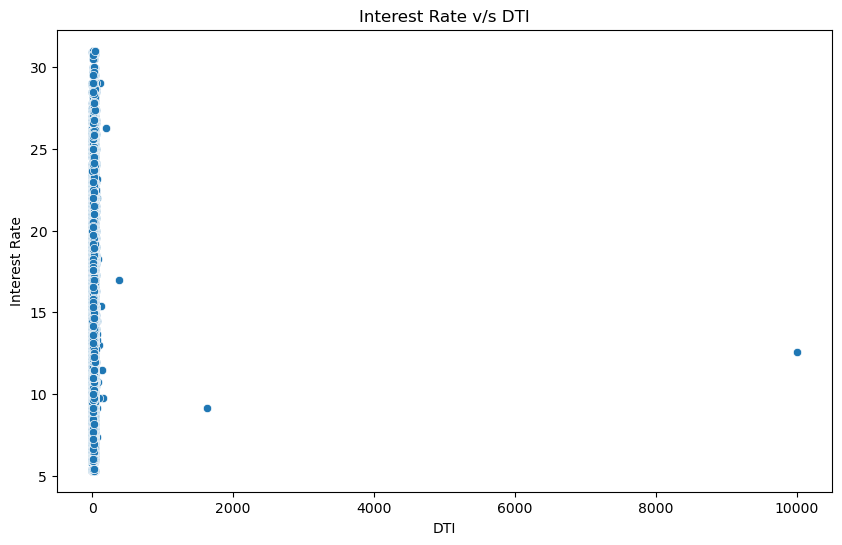

In [12]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'dti', y = 'int_rate' , data = df)
plt.xlabel('DTI')
plt.ylabel('Interest Rate')
plt.title('Interest Rate v/s DTI')
plt.plot()


### **Categorical - Categorical Analysis**

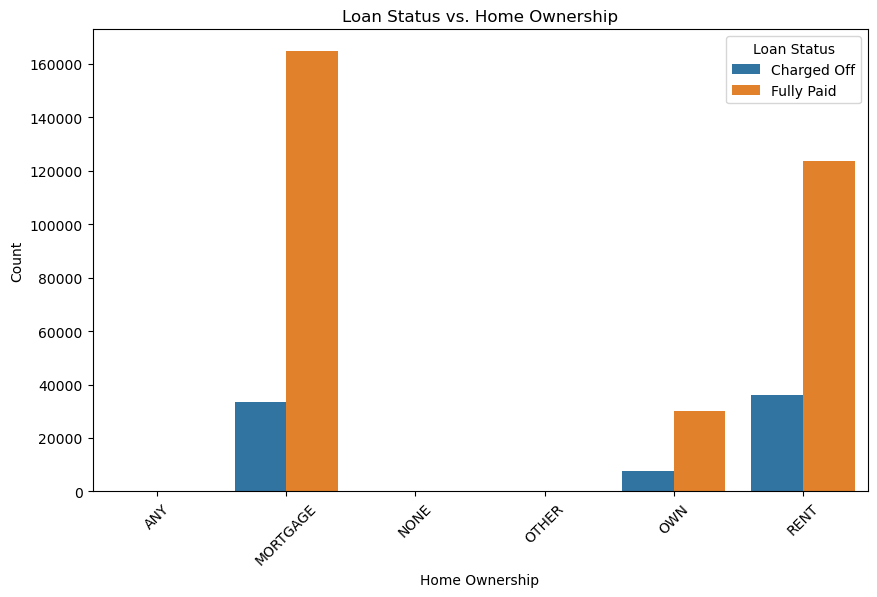

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x='home_ownership', hue='loan_status', data=df)
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Loan Status vs. Home Ownership')
plt.legend(title='Loan Status')
plt.xticks(rotation=45)
plt.show()


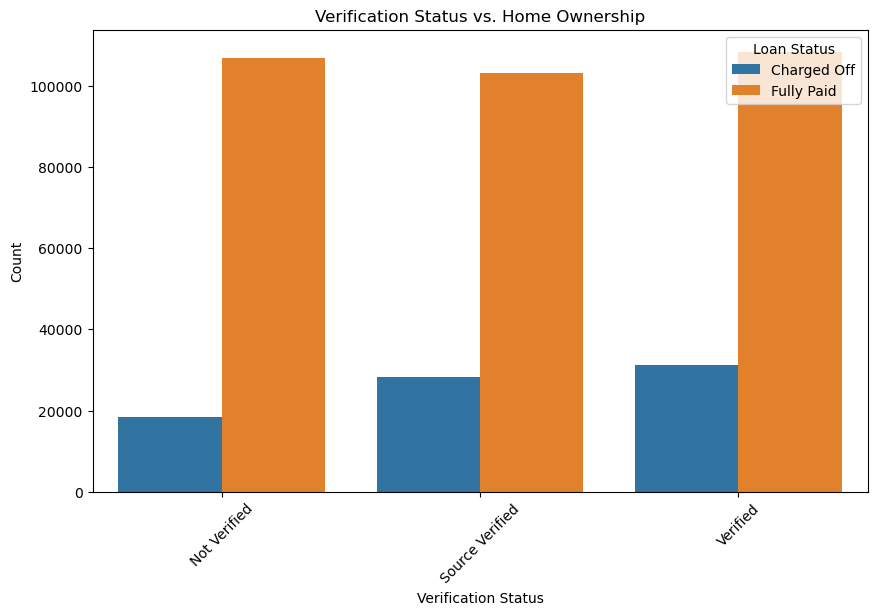

In [14]:
'verification_status' 'loan_status'


plt.figure(figsize=(10, 6))
sns.countplot(x='verification_status', hue='loan_status', data=df)
plt.xlabel('Verification Status')
plt.ylabel('Count')
plt.title('Verification Status vs. Home Ownership')
plt.legend(title='Loan Status')
plt.xticks(rotation=45)
plt.show()

### **Categorical-Numerical Columns**

[]

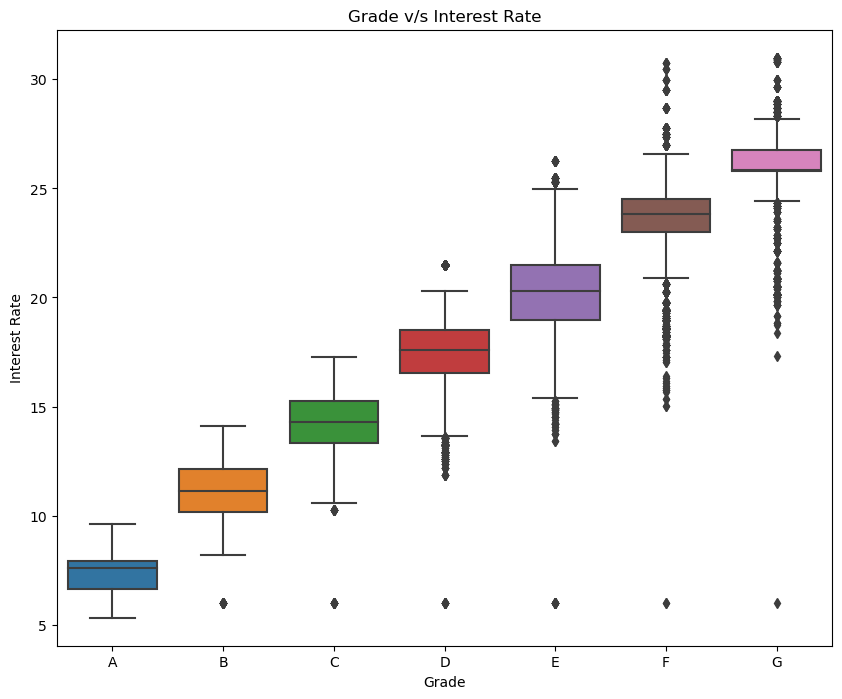

In [15]:
plt.figure(figsize=(10,8))
sns.boxplot(x = 'grade', y = 'int_rate', data = df)
plt.xlabel('Grade')
plt.ylabel('Interest Rate')
plt.title('Grade v/s Interest Rate')
plt.plot()

[]

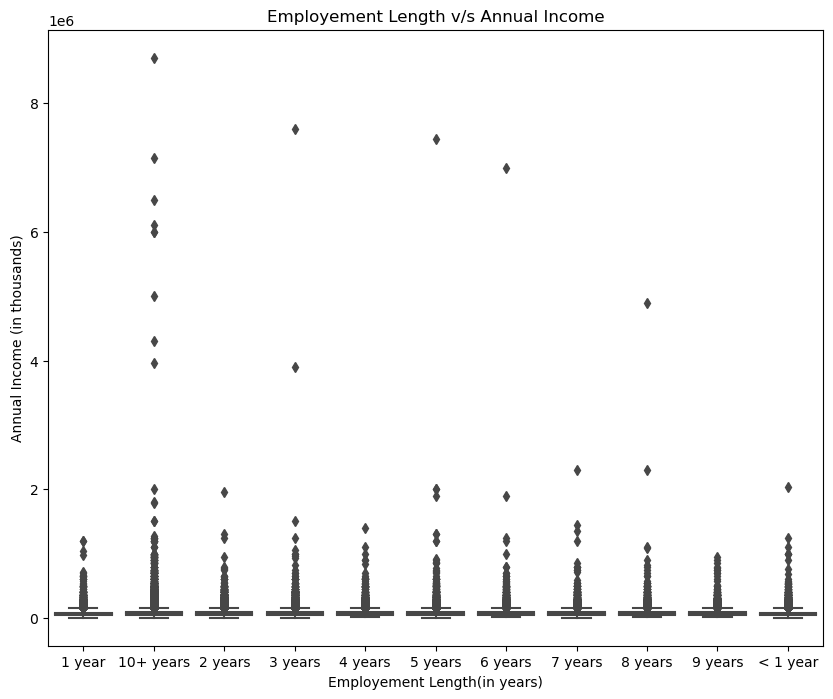

In [16]:
'emp_length' 'annual_inc'

plt.figure(figsize=(10,8))
sns.boxplot(x = 'emp_length', y = 'annual_inc', data = df)
plt.xlabel('Employement Length(in years)')
plt.ylabel('Annual Income (in thousands)')
plt.title('Employement Length v/s Annual Income')
plt.plot()

[]

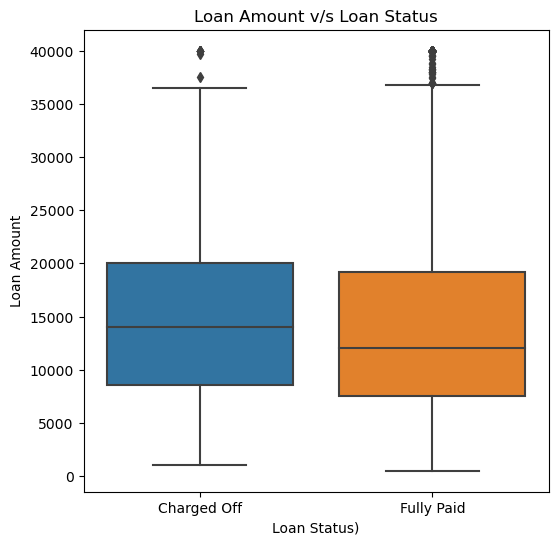

In [17]:
'loan_status' 'loan_amnt'

plt.figure(figsize=(6,6))
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = df)
plt.xlabel('Loan Status)')
plt.ylabel('Loan Amount')
plt.title('Loan Amount v/s Loan Status')
plt.plot()

## **Correlation Matrix of Numerical Columns**

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0, 0.5, 'loan_amnt'),
  Text(0, 1.5, 'int_rate'),
  Text(0, 2.5, 'installment'),
  Text(0, 3.5, 'annual_inc'),
  Text(0, 4.5, 'dti'),
  Text(0, 5.5, 'open_acc'),
  Text(0, 6.5, 'pub_rec'),
  Text(0, 7.5, 'revol_bal'),
  Text(0, 8.5, 'revol_util'),
  Text(0, 9.5, 'total_acc'),
  Text(0, 10.5, 'mort_acc'),
  Text(0, 11.5, 'pub_rec_bankruptcies')])

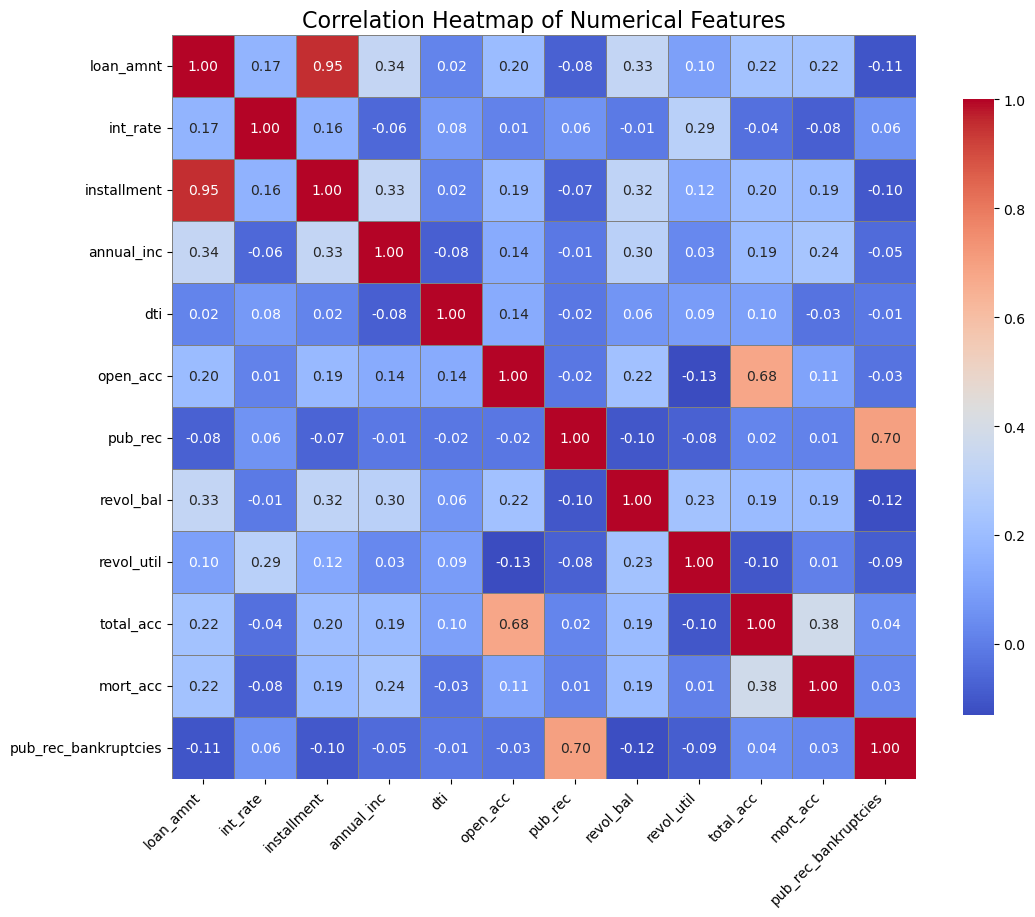

In [18]:
correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm', 
            linewidths=0.5, 
            linecolor='gray', 
            cbar_kws={"shrink": .8}, 
            square=True)

plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# **Data Preprocessing**

## **Duplicate Values Check**

In [19]:
df.duplicated().sum()

0

In [20]:
subset = ['loan_amnt', 'term', 'int_rate', 'annual_inc', 'purpose', 'emp_length']

df.duplicated(subset=subset).sum()

13669

In [21]:
df[df.duplicated(subset=subset)].sort_values(by = 'loan_amnt', ascending=True)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
291027,1000.0,36 months,13.35,33.87,C,C2,Assistant Director,10+ years,MORTGAGE,35000.0,...,10.0,0.0,12998.0,54.6,26.0,w,INDIVIDUAL,1.0,0.0,"9614 Samantha Lakes Suite 465\r\nMariahstad, W..."
328334,1000.0,36 months,10.99,32.74,B,B4,Sales Manager,10+ years,RENT,50000.0,...,10.0,1.0,7749.0,63.0,13.0,w,INDIVIDUAL,0.0,1.0,"7674 Chris Mews\r\nJarvisborough, IA 30723"
329386,1000.0,36 months,17.77,36.04,D,D1,Old national,10+ years,MORTGAGE,60000.0,...,10.0,0.0,10158.0,45.3,49.0,f,INDIVIDUAL,8.0,0.0,"704 Matthew Valley Suite 626\r\nKevintown, MD ..."
284072,1800.0,36 months,17.57,64.69,D,D4,patient care svcs resource coodinator,2 years,RENT,40000.0,...,29.0,0.0,11381.0,28.7,40.0,f,INDIVIDUAL,0.0,0.0,"4822 Thomas Square\r\nSharonchester, PA 93700"
74714,2000.0,36 months,21.98,76.37,E,E4,southwest oilfield products,10+ years,MORTGAGE,60000.0,...,2.0,0.0,2633.0,94.0,3.0,w,INDIVIDUAL,0.0,0.0,"65717 Brown Plains Suite 657\r\nJeffersonton, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303874,35000.0,36 months,18.25,1269.73,E,E1,Manager,10+ years,MORTGAGE,96000.0,...,17.0,0.0,69816.0,81.0,27.0,w,INDIVIDUAL,3.0,0.0,"252 Paul Fork Suite 487\r\nBradshawshire, DE 9..."
280834,35000.0,36 months,10.99,1145.69,B,B3,Manager,10+ years,MORTGAGE,90000.0,...,15.0,0.0,23888.0,29.1,35.0,w,INDIVIDUAL,4.0,0.0,"891 Hopkins Lodge\r\nCynthiaport, NM 05113"
185785,35000.0,60 months,12.29,783.70,C,C1,Associate Professor,8 years,MORTGAGE,140000.0,...,25.0,0.0,71478.0,37.7,55.0,w,INDIVIDUAL,4.0,0.0,"6703 James Creek\r\nNorth Jamesbury, TX 29597"
99706,35000.0,36 months,11.99,1162.34,B,B5,Engineer,10+ years,OWN,150000.0,...,9.0,0.0,33046.0,43.5,24.0,f,INDIVIDUAL,2.0,0.0,"9130 Ingram Rue\r\nSloanborough, AK 22690"


In [22]:
df = df.drop_duplicates(subset=subset)
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


## **Missing Values Treatment**

In [23]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22574
emp_length              18124
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1712
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                274
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37466
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [24]:
df['emp_title'] = df['emp_title'].cat.add_categories('Unknown')
df['emp_title'] = df['emp_title'].fillna('Unknown')

In [25]:
df['emp_length'] = df['emp_length'].cat.add_categories('Not Provided')
df['emp_length'] = df['emp_length'].fillna('Not Provided')

In [26]:
missing_title_count = df['title'].isnull().sum()
total_count = df.shape[0]

proportion = missing_title_count/total_count
print(proportion)

0.0044774440907937784


In [27]:
#Given such a low proportion of titles with Null values, it is better to drop it:
df.dropna(subset=['title'], inplace=True)

In [28]:
print(df.shape)

(380649, 27)


In [29]:
df['revol_util'] = df['revol_util'].fillna(0)

In [30]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
mort_acc_reshaped = df['mort_acc'].values.reshape(-1,1)
df['mort_acc'] = imputer.fit_transform(mort_acc_reshaped)

In [31]:
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].fillna(0)

In [32]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

## **Outlier Treatment**

In [33]:
num_cols = df.select_dtypes(include='number').columns
num_cols

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

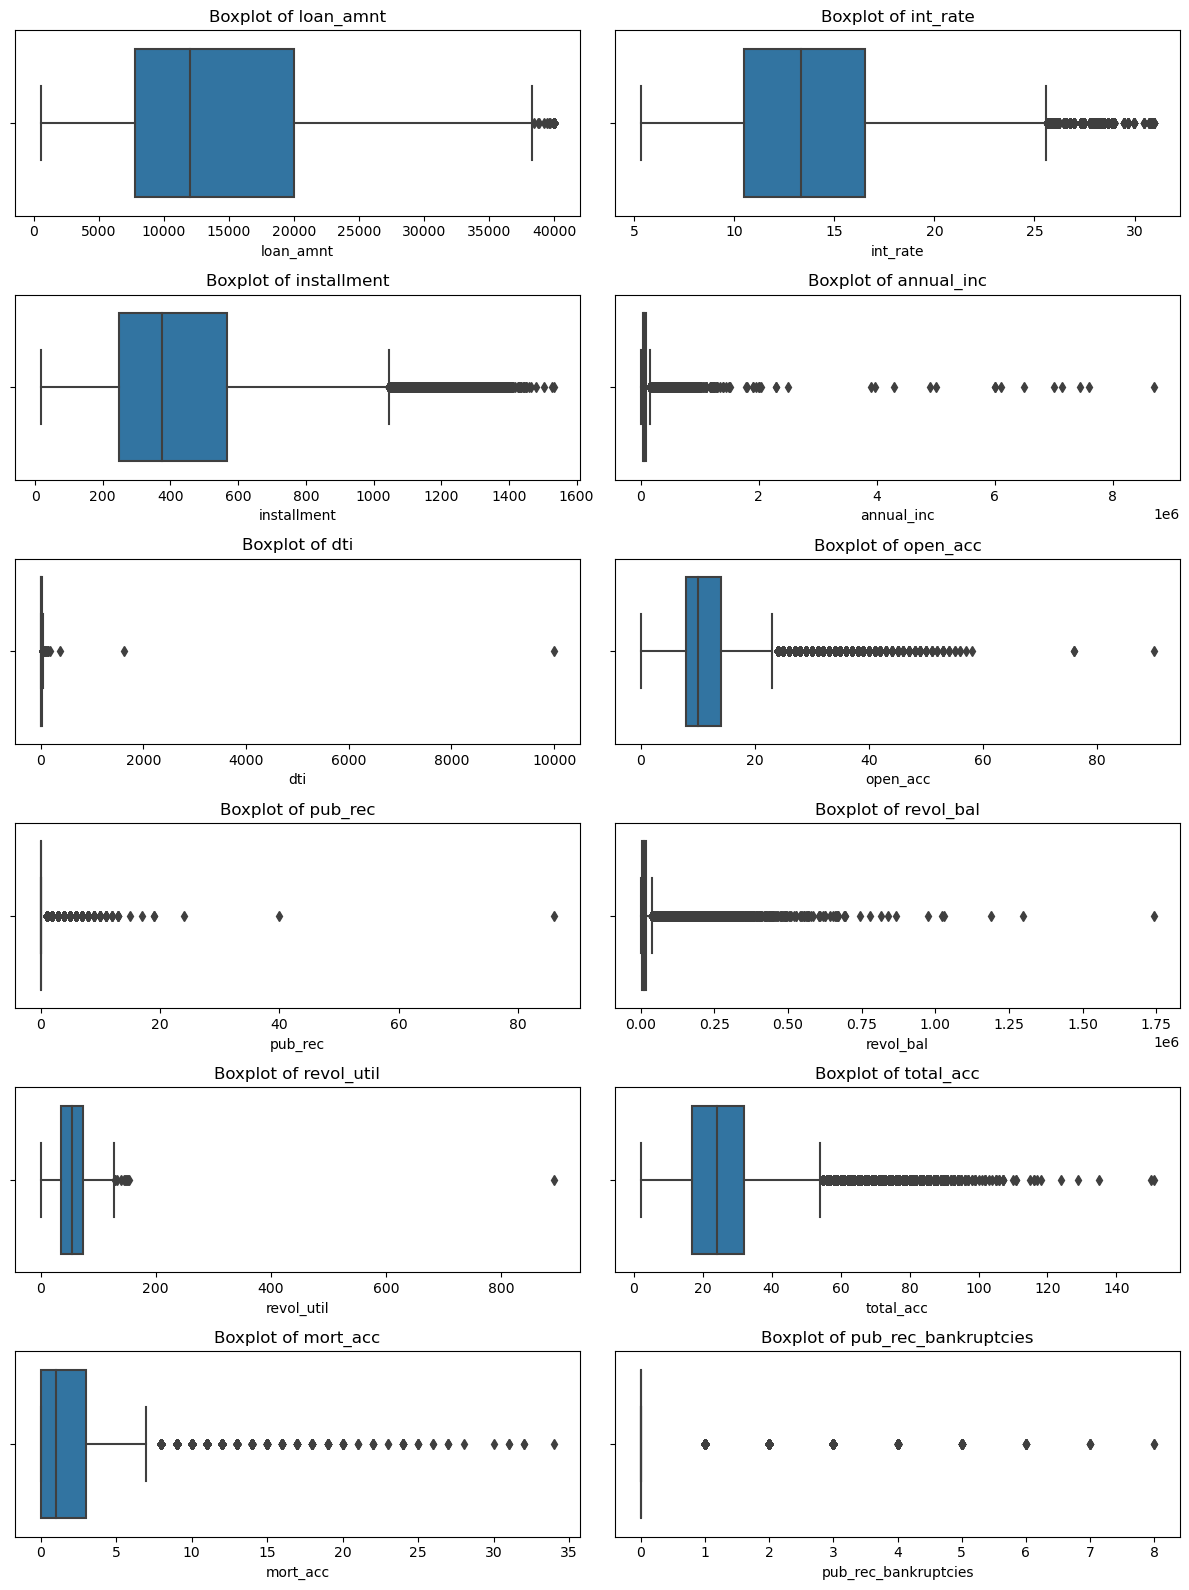

In [34]:
fig, axes = plt.subplots(nrows = 6, ncols = 2, figsize = (12, 16))
axes = axes.flatten()
for ax, col in zip(axes, num_cols):
    sns.boxplot(x = col, data = df, ax = ax)
    ax.set_title(f'Boxplot of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [35]:
#Converting pub_rec_bankruptcies and pub_rec to categories as they don't hold much numerical significance
df['pub_rec_bankruptcies'] = np.where(df['pub_rec_bankruptcies'] > 0, 'yes', 'no')
df['pub_rec'] = np.where(df['pub_rec'] > 0, 'yes', 'no')
df[['pub_rec_bankruptcies', 'pub_rec']] = df[['pub_rec_bankruptcies', 'pub_rec']].astype('category')

In [36]:
# Numeric columns after converting public records to category
num_cols = df.select_dtypes(include='number').columns
num_cols

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc'],
      dtype='object')

For removing the outliers of other numerical features, we will use IQR method

In [37]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 -Q1
    df = df[~((df[col] < (Q1 - 1.5*Q1)) | (df[col] > (Q3 + 1.5*Q3)))]

In [38]:
df.shape

(358227, 27)

## **Feature Engineering**

In [39]:
df['address'].sample(10)

372218                           USS Brooks\r\nFPO AE 30723
7739         2969 Smith Fields\r\nSouth Wendyfort, PA 05113
77058            1446 Smith Ridge\r\nBradshawfort, MA 05113
217393    07633 Donald Gardens Apt. 172\r\nRosaleston, L...
254455    168 Matthews Orchard Suite 659\r\nPort Kimberl...
59037                               USS Lee\r\nFPO AE 11650
43407     82925 Cody Skyway Apt. 054\r\nEddieland, IN 48052
259254              474 Tina Loaf\r\nNew Nicholas, NC 70466
150911    070 Torres Mountain Suite 107\r\nSouth Michell...
142174                            USS Gomez\r\nFPO AE 00813
Name: address, dtype: category
Categories (393700, object): ['000 Adam Station Apt. 329\r\nAshleyberg, AZ 2..., '000 Adrian Cliffs\r\nRandyton, LA 22690', '000 Alexandria Street\r\nPort Richard, FL 22690', '000 Amber Court\r\nLake Pamelatown, IN 00813', ..., 'Unit 9995 Box 8360\r\nDPO AP 00813', 'Unit 9996 Box 9255\r\nDPO AP 05113', 'Unit 9997 Box 3228\r\nDPO AA 11650', 'Unit 9997 Box 3834\r\nDPO 

In [40]:
df['address'] = df['address'].astype(str)

In [41]:
def state_zip(z):
    l = z.split()
    return pd.Series((l[-2], l[-1]))

df[['state', 'zip_code']] = df['address'].apply(state_zip)
    

In [42]:
df.drop(columns=['address'], axis = 1, inplace= True)

In [43]:
df.zip_code.unique()

array(['22690', '05113', '00813', '11650', '30723', '70466', '29597',
       '48052', '86630', '93700'], dtype=object)

In [44]:
df.zip_code = df.zip_code.astype('category')

In [45]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,state,zip_code
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,no,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,no,OK,22690
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,no,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,no,SD,05113
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,no,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,no,WV,05113
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,no,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,no,MA,00813
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,no,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,no,VA,11650


## **Multicollinearity Check**

In [46]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,state,zip_code
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,no,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,no,OK,22690
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,no,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,no,SD,05113
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,no,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,no,WV,05113
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,no,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,no,MA,00813
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,no,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,no,VA,11650


In [47]:
numerical_columns = df.select_dtypes(include='number').columns.tolist()
print(numerical_columns)

['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc']


In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[numerical_columns]
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['Data'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

,Feature,Data
0,loan_amnt,45.360493
1,int_rate,10.224102
2,installment,44.665797
3,annual_inc,7.051894
4,dti,7.217180
5,open_acc,12.699254
6,revol_bal,5.035719
7,revol_util,8.100486
8,total_acc,12.275764
9,mort_acc,2.254354


In [49]:
vif_data.sort_values(by='Data', ascending=False)

,Feature,Data
0,loan_amnt,45.360493
2,installment,44.665797
5,open_acc,12.699254
8,total_acc,12.275764
1,int_rate,10.224102
7,revol_util,8.100486
4,dti,7.217180
3,annual_inc,7.051894
6,revol_bal,5.035719
9,mort_acc,2.254354


In [50]:
df[['loan_amnt', 'installment']].corr()

,loan_amnt,installment
loan_amnt,1.00000,0.95347
installment,0.95347,1.00000


In [51]:
df.drop(columns= 'installment', inplace=True)

## **Encoding The Data**

In [52]:
df.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,state,zip_code
0,10000.0,36 months,11.44,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,...,no,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,no,OK,22690
1,8000.0,36 months,11.99,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,...,no,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,no,SD,05113
2,15600.0,36 months,10.49,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,...,no,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,no,WV,05113
3,7200.0,36 months,6.49,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,...,no,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,no,MA,00813
4,24375.0,60 months,17.27,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,...,no,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,no,VA,11650


In [53]:
df['loan_status'] = df['loan_status'].map({'Fully Paid': 0, 'Charged Off': 1}).astype(int)

In [54]:
x = df.drop(columns=['loan_status'])
x.reset_index(inplace=True, drop=True)
y = df['loan_status']
y.reset_index(drop=True, inplace=True)

In [55]:
# Encoding Binary features into numerical dtype

x['term']=x['term'].map({' 36 months': 36, ' 60 months':60}).astype(int)
x['pub_rec']=x['pub_rec'].map({'no': 0, 'yes':1}).astype(int)
x['pub_rec_bankruptcies']=x['pub_rec_bankruptcies'].map({'no': 0, 'yes':1}).astype(int)

In [56]:
from sklearn.preprocessing import OneHotEncoder

In [57]:
cat_cols = x.select_dtypes('category').columns
cat_cols

Index(['grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'verification_status', 'issue_d', 'purpose', 'title',
       'earliest_cr_line', 'initial_list_status', 'application_type',
       'zip_code'],
      dtype='object')

In [58]:
encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(x[cat_cols])

In [59]:
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(cat_cols))

In [60]:
encoded_df

,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A1,sub_grade_A2,sub_grade_A3,...,zip_code_00813,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358222,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
358223,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
358224,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
358225,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [64]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358227 entries, 0 to 358226
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   loan_amnt             358227 non-null  float64 
 1   term                  358227 non-null  int64   
 2   int_rate              358227 non-null  float64 
 3   grade                 358227 non-null  category
 4   sub_grade             358227 non-null  category
 5   emp_title             358227 non-null  category
 6   emp_length            358227 non-null  category
 7   home_ownership        358227 non-null  category
 8   annual_inc            358227 non-null  float64 
 9   verification_status   358227 non-null  category
 10  issue_d               358227 non-null  category
 11  purpose               358227 non-null  category
 12  title                 358227 non-null  category
 13  dti                   358227 non-null  float64 
 14  earliest_cr_line      358227 non-nul

In [65]:
numerical_data = x.select_dtypes(include='number')
numerical_data

,loan_amnt,term,int_rate,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
0,10000.0,36,11.44,117000.0,26.24,16.0,0,36369.0,41.8,25.0,0.0,0
1,8000.0,36,11.99,65000.0,22.05,17.0,0,20131.0,53.3,27.0,3.0,0
2,15600.0,36,10.49,43057.0,12.79,13.0,0,11987.0,92.2,26.0,0.0,0
3,7200.0,36,6.49,54000.0,2.60,6.0,0,5472.0,21.5,13.0,0.0,0
4,24375.0,60,17.27,55000.0,33.95,13.0,0,24584.0,69.8,43.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
358222,10000.0,60,10.99,40000.0,15.63,6.0,0,1990.0,34.3,23.0,0.0,0
358223,21000.0,36,12.29,110000.0,21.45,6.0,0,43263.0,95.7,8.0,1.0,0
358224,5000.0,36,9.99,56500.0,17.56,15.0,0,32704.0,66.9,23.0,0.0,0
358225,21000.0,60,15.31,64000.0,15.88,9.0,0,15704.0,53.8,20.0,5.0,0


## **Train test Split**